# 
<font face="华文行楷" size=10 >李雅普诺夫指数 (Yiapunov Exponent)</font> 

### >`翟家辉 19720212203881`

---------------------
________________________

# -----------------------------------------------目录---------------------------------------------


## &#x2705;壹 · 李雅普诺夫指数简介
 
## &#x2705;贰 · 循环次数 $n$ 与步长 $r$ 的选择

## &#x2705;叁 · 该映射的分叉图

## &#x2705;肆 · 李雅普诺夫指数的计算

## &#x2705;伍 · 不动点的刻绘

## &#x274E;陆 · 问题与错误

## &#x2705;柒 · 致谢

---------
--------
# 壹 · 李雅普诺夫指数简介

>李雅普诺夫指数刻画系统相空间任意一条微扰的轨道以何种方式偏离原轨道。我们任意选择两条靠得很近的轨道，它们的初始状态分别为：$x_0$ 和 $x_0+\delta x_0$。迭代$n$次之后，系统状态分别为 $x_n$ 和 $x_n+\delta x_n$。定义李雅普诺夫指数 $\lambda$ 满足如下等式：$$|\delta x_n|=e^{\lambda n}|\delta x_0|$$
两边取自然对数即得 $\lambda$ ：$$\lambda=\frac 1 n ln\frac{|\delta x_n|}{|\delta x_0|} 
=\lambda=\frac 1 n |\frac{f^n(x_0+\delta x_0)-f^n(x_0)}{\delta x_0}|
=\frac{1}{n}\ln \left|(f^n)^{'}(x_{0})) \right|
=\frac{1}{n}\ln \left|\prod_{i=0}^{n-1} f^{'}(x_i) \right|$$ 
$$=\frac{1}{n}\sum_{i=0}^{n-1} \ln \left|f^{'}(x_i) \right| $$


下面以映射 $x_{n+1}=rx_ne^{-x_n}$ 为例，其中$x\in(0,\infty)$,$r\in(0,\infty)$

---------
--------
# 贰 · 循环次数  𝑛  与步长  𝑟  的选择

In [1]:
#库引入
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
#变量控件定义
N=widgets.IntSlider(
    value=20,
    min=1,
    max=100,
    step=10,
    description='循环次数:',
    disabled=False,
    continuous_update=False,
    readout=True,
    readout_format='d',
)

x0=widgets.FloatSlider(
    value=1,
    min=1,
    max=50.00,
    step=0.01,
    description='初值:',
    disabled=False,
    continuous_update=False,
    readout=True,
    readout_format='.2f',
)

R=widgets.FloatSlider(
    value=100,
    min=0,
    max=1000,
    step=0.01,
    description='r:',
    disabled=False,
    continuous_update=False,
    readout=True,
    readout_format='.2f',
)

play = widgets.Play(
    value=0,
    min=0,
    max=100,
    step=1,
    description="Press play",
    disabled=False
)

In [3]:

def main(r,N,x0):
    y=[x0]
    for i in range(N):
        h=np.exp(-y[i])
        s=r*y[i]*h
        y.append(s)
    return y

def HUITU(r,N,x0):
    x=np.linspace(0,N,N+1)
    print("Xn与循环次数n的关系图")
    plt.plot(x,main(r,N,x0),linewidth=1.5)
    plt.ylabel("$x_n$")
    plt.xlabel("n")
    plt.title(f"r is {r}")
    plt.show()
    
widgets.interact(HUITU,r=R,N=N,x0=x0)#执行绘图。
print("r从0到100的演示性变化：")
widgets.interactive(HUITU,r=play,N=N,x0=x0)#执行动画。

interactive(children=(FloatSlider(value=100.0, continuous_update=False, description='r:', max=1000.0, step=0.0…

r从0到100的演示性变化：


interactive(children=(Play(value=0, description='Press play'), IntSlider(value=20, continuous_update=False, de…

---------
--------
# 叁 · 该映射的分叉图  

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import sympy as s

In [5]:
def main2(初值,迭代次数,输出迭代占比,Rmin,Rmax,Ymin,Ymax):
    y=初值
    n=迭代次数
    n0=round(n*(1-输出迭代占比))
    r=np.linspace(Rmin,Rmax,10000)
    print("输出迭代数"+str(n-n0))
    print("总迭代数"+str(n))
    print("r位于("+str(Rmin)+","+str(Rmax)+")")
    print("其中y位于("+str(Ymin)+","+str(Ymax)+")")
    plt.figure(figsize=(45,35))
    for i in range(n):
        h=np.exp(-y)
        y=r*y*h
        if i>=n0:
            plt.ylim(ymin=Ymin, ymax=Ymax)
            #颜色变化
            a1=(np.sin(5*i/(n-i)*3.14))/2+0.5
            a2=(np.sin(3*i/(n-i)*3.14))/2+0.5
            a3=(np.sin(2*i/(n-i)*3.14))/2+0.5
            plt.plot(r,y,',',c=(a1,a2,a3),linewidth=0.01,markersize=0.1)
    plt.title("the X_n with the r",size=30)
    plt.xlabel("r",size=30)
    plt.ylabel("X_n",size=30)
    plt.show()
    return 0

In [6]:

widgets.interact_manual(
    main2,
    初值=widgets.FloatSlider(min=0, max=30, step=0.01, value=1, readout_format='.2f',description='初值:'),
    迭代次数=widgets.IntSlider(min=0, max=1000, step=1, value=500,description='迭代次数:'),
    输出迭代占比=(0.001,1,0.001),
    Rmin=widgets.FloatSlider(min=0, max=1000, step=0.001, value=0, readout_format='.3f',description='Rmin:'),
    Rmax=widgets.FloatSlider(min=0, max=500, step=0.001, value=100, readout_format='.3f',description='Rmax:'),
    Ymin=widgets.FloatSlider(min=0, max=300, step=0.001, value=0, readout_format='.3f',description='Ymin:'),
    Ymax=widgets.FloatSlider(min=0, max=300, step=0.001, value=40,description='Ymax:',readout_format='.3f')
)

interactive(children=(FloatSlider(value=1.0, description='初值:', max=30.0, step=0.01), IntSlider(value=500, des…

<function __main__.main2(初值, 迭代次数, 输出迭代占比, Rmin, Rmax, Ymin, Ymax)>

---------
--------
# 肆 · 李雅普诺夫指数的计算  

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import sympy as s

In [5]:
#求导运算
x,r= s.symbols('x r')
f=s.diff(r*x*s.E**(-x), x)
print(f)
f2=s.latex(f)
print('$',f2,'$')

-r*x*exp(-x) + r*exp(-x)
$ - r x e^{- x} + r e^{- x} $


导数即 $ - r x e^{- x} + r e^{- x} $

In [6]:
 def main2(初值,迭代次数,输出迭代占比,Rmin,Rmax,Ymin,Ymax,bdd):
    y=初值
    n=迭代次数
    n0=round(n*(1-输出迭代占比))
    r=np.linspace(Rmin,Rmax,10000)
    print("输出迭代数"+str(n-n0))
    print("总迭代数"+str(n))
    print("r位于("+str(Rmin)+","+str(Rmax)+")")
    print("其中y位于("+str(Ymin)+","+str(Ymax)+")")
    plt.figure(figsize=(30,15))
    la=0
    for i in range(n):
        h=np.exp(-y)
        if i>=1:
            la=np.log(np.abs(-r*y*np.exp(-y)+r*np.exp(-y)))+la
            #计算并逐次求和
            if i==n-1:
                la1=la/n
        y=r*y*h
        if i>=n0:
            plt.ylim(ymin=Ymin, ymax=Ymax)
            ax1 = plt.gca()
            ax1.plot(r,y,',',c='black',linewidth=0.01,markersize=0.1)
            ax1.set_ylabel('X_n', color='black',size=25)

    # 创建与ax1共享x轴的第二个子图
    ax2 = ax1.twinx() 
    ax2.set_ylabel('lamba', color='r',size=25) 
    ax2.plot(r,la1,c='red')
    ax2.tick_params(axis='y', labelcolor='r',size=25)
    plt.title("the Lamba with the r",size=25)
    plt.plot(r,r-r,"--",c="b")
    if bdd is True:
        for nn in range(1,10000):
            if la1[nn-1]*la1[nn]<0:
                print(f"临界点R={r[nn]}")
    plt.tight_layout()
    plt.show()

In [7]:

widgets.interact_manual(
    main2,
    初值=widgets.FloatSlider(min=0, max=30, step=0.01, value=1, readout_format='.2f',description='初值:'),
    迭代次数=widgets.IntSlider(min=0, max=1000, step=1, value=500,description='迭代次数:'),
    输出迭代占比=(0.001,1,0.001),
    Rmin=widgets.FloatSlider(min=0.001, max=1000, step=0.001, value=0, readout_format='.3f',description='Rmin:'),
    Rmax=widgets.FloatSlider(min=0, max=500, step=0.001, value=70, readout_format='.3f',description='Rmax:'),
    Ymin=widgets.FloatSlider(min=0, max=300, step=0.001, value=0, readout_format='.3f',description='Ymin:'),
    Ymax=widgets.FloatSlider(min=0, max=300, step=0.001, value=15,description='Ymax:',readout_format='.3f'),
    bdd=widgets.Checkbox(value=False,description='显示临界点',disabled=False,indent=False)
)

interactive(children=(FloatSlider(value=1.0, description='初值:', max=30.0, step=0.01), IntSlider(value=500, des…

<function __main__.main2(初值, 迭代次数, 输出迭代占比, Rmin, Rmax, Ymin, Ymax, bdd)>

例图：
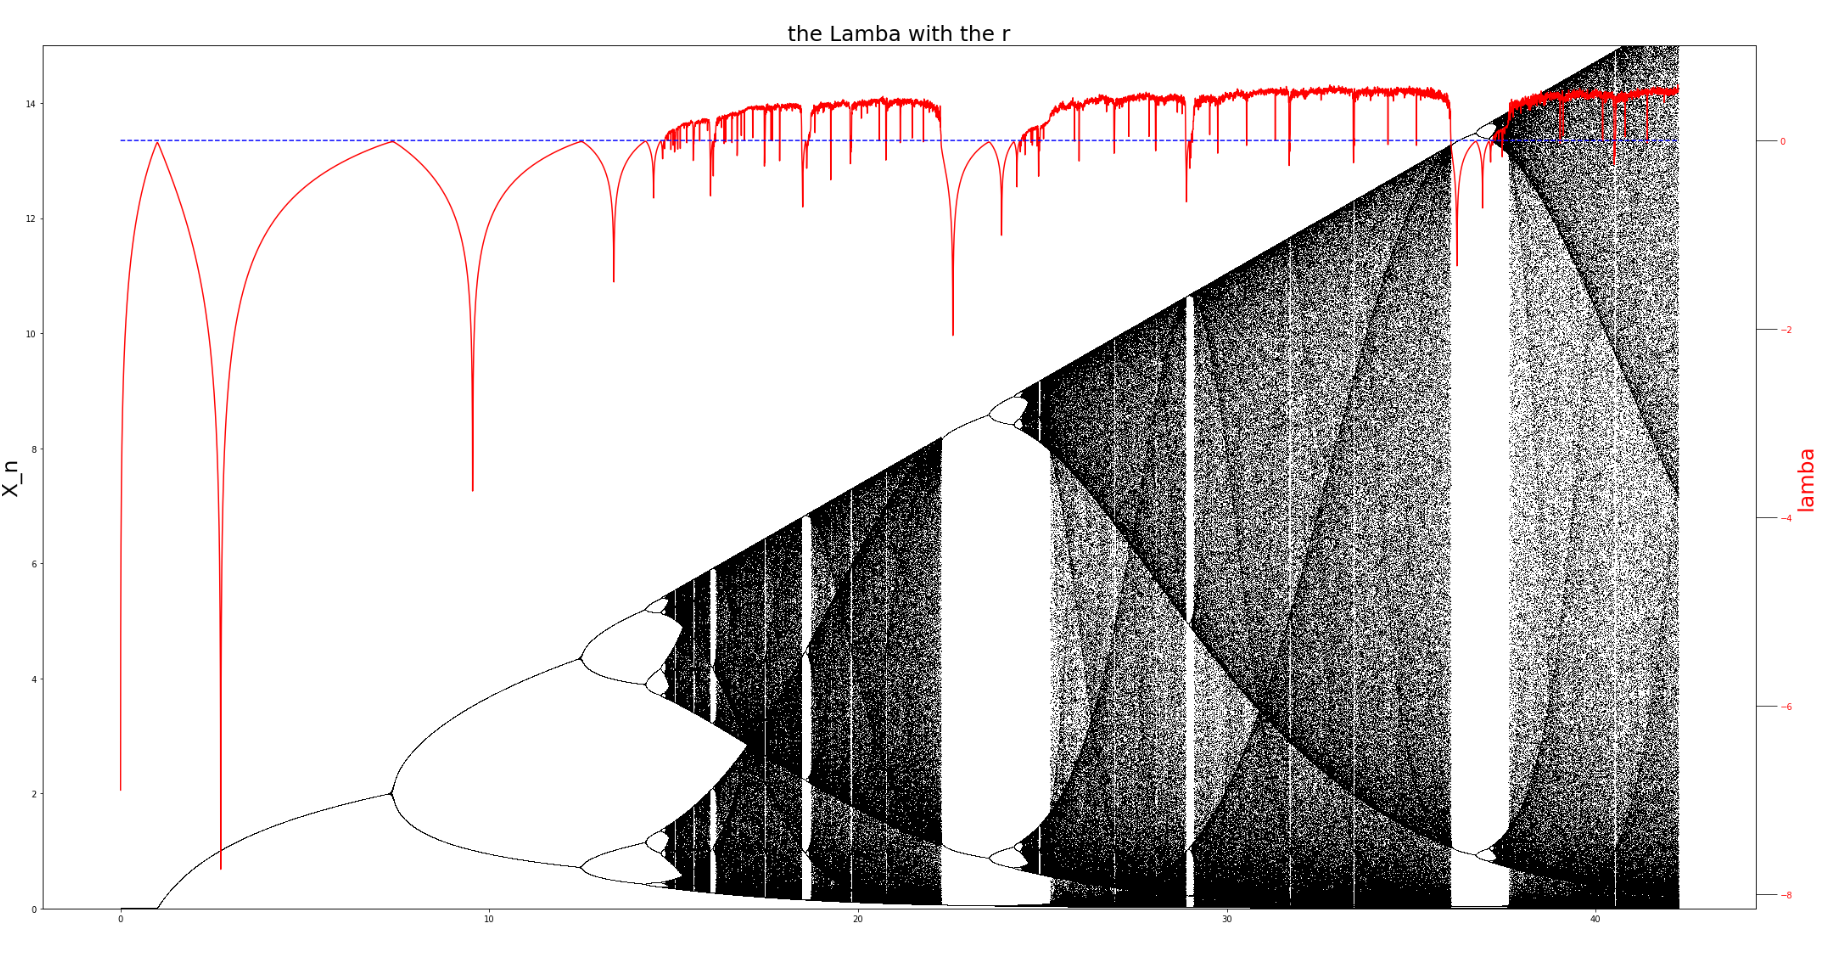

---------
--------
# 伍 · 不动点的刻绘

## >`解析解（周期二轨道无解）`

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import sympy
from scipy.optimize import fsolve

In [11]:
#周期一轨道
x=sympy.Symbol('x')
r=sympy.Symbol('r')
f1=r*x*sympy.E**(-x)-x
h=sympy.solve(f1,x)
print("不动点为",h)

NameError: name 'sympy' is not defined

In [ ]:
#周期二轨道(无法求解)
x=sympy.Symbol('x')
r=sympy.Symbol('r')
f1=r*(r*x*sympy.E**(-x))*sympy.E**(-r*x*sympy.E**(-x))-x
sympy.solve(f1,x)

## &#x1F6A9;在周期二轨道不动点的推导上，翁凯枫同学已做了很好的工作，故不再重复。下面应用二分法原理，进行数值求解。

## >`图像表示`

In [17]:
def main3(迭代次数,R1,R2,R3,R4,R5,R6,Xmax,Xmin,H,dd):
    x=np.linspace(Xmin,Xmax,1000)
    n=迭代次数
    y1=y2=y3=y4=y5=y6=x
    for i in range(n):
        y1=R1*y1*np.exp(-y1)
        y2=R2*y2*np.exp(-y2)
        y3=R3*y3*np.exp(-y3)
        y4=R4*y4*np.exp(-y4)
        y5=R5*y5*np.exp(-y5)
        y6=R6*y6*np.exp(-y6)
    print(f"周期数n为{n}")
    if dd is True:
        for nn in range(1,1000):
            #print(y6[nn],x[nn],n)
            if (y6[nn-1]-x[nn-1])*(y6[nn]-x[nn])<0:
                print(f"不动点X={x[nn]}，此时r={R6}")
            if (y5[nn-1]-x[nn-1])*(y5[nn]-x[nn])<0:
                print(f"不动点X={x[nn]}，此时r={R5}")
            if (y4[nn-1]-x[nn-1])*(y4[nn]-x[nn])<0:
                print(f"不动点X={x[nn]}，此时r={R4}")
            if (y3[nn-1]-x[nn-1])*(y3[nn]-x[nn])<0:
                print(f"不动点X={x[nn]}，此时r={R3}")
            if (y2[nn-1]-x[nn-1])*(y2[nn]-x[nn])<0:
                print(f"不动点X={x[nn]}，此时r={R2}")
            if (y1[nn-1]-x[nn-1])*(y1[nn]-x[nn])<0:
                print(f"不动点X={x[nn]}，此时r={R1}")
        
    plt.figure(figsize=(15,10))
    plt.plot(x,y1,label="R1="+str(R1),linestyle="--")
    plt.plot(x,y2,label="R2="+str(R2),linestyle="--")
    plt.plot(x,y3,label="R3="+str(R3),linestyle="--")
    plt.plot(x,y4,label="R4="+str(R4),linestyle="--")
    plt.plot(x,y5,label="R5="+str(R5),linestyle="--")
    plt.plot(x,y6,label="R6="+str(R6),linestyle="--")
    plt.plot(x,x,label=f"X_n=X_n++{n}",color="black",)
    plt.legend(loc="best")
    plt.ylabel(f'X_n+{n}',size=15)
    plt.xlabel('X_n',size=15)
    plt.title(f"X_n and X_n+{n},N is{n}",size=25)
    

In [18]:
#控件排版
grid = widgets.GridspecLayout(4, 3)
grid[0,0]=widgets.FloatSlider(min=0, max=100, step=0.001, value=1, readout_format='.3f',description='R1:')
grid[0,1]=widgets.FloatSlider(min=0, max=100, step=0.001, value=3, readout_format='.3f',description='R2:')
grid[0,2]=widgets.FloatSlider(min=0, max=100, step=0.001, value=5, readout_format='.3f',description='R3:')
grid[1,0]=widgets.FloatSlider(min=0, max=100, step=0.001, value=10, readout_format='.3f',description='R4:')
grid[1,1]=widgets.FloatSlider(min=0, max=100, step=0.001, value=13, readout_format='.3f',description='R5:')
grid[1,2]=widgets.FloatSlider(min=0, max=100, step=0.001, value=16, readout_format='.3f',description='R6:')
grid[2,0]=widgets.FloatSlider(min=0, max=50, step=0.001, value=10, readout_format='.3f',description='Xmax:')
grid[2,1]=widgets.FloatSlider(min=0, max=50, step=0.001, value=0, readout_format='.3f',description='Xmin:')
grid[2,2]=widgets.Checkbox(value=False,description='显示不动点',disabled=False,indent=False)
grid

h=widgets.IntSlider(min=0, max=50, step=1, value=3, readout_format='d',description='迭代次数:')
print('选定迭代次数N后，点击播放')
N=widgets.Play(value=1,min=0,max=40,step=1,description="Press play",disabled=False)

def update_x_range(*args):
    N.max =h.value
N.observe(update_x_range, 'value')

#问题，交互组件显示格式不正确

widgets.interactive(main3,迭代次数=N,R1=grid[0,0],R2=grid[0,1],R3=grid[0,2],R4=grid[1,0],R5=grid[1,1],R6=grid[1,2],Xmin=grid[2,1],Xmax=grid[2,0],H=h,dd=grid[2,2])

选定迭代次数N后，点击播放


interactive(children=(Play(value=1, description='Press play', max=40), FloatSlider(value=1.0, description='R1:…

### 虚线与实线交点即为该周期（n）下不动点，注意该不动点不一定稳定。
例图：
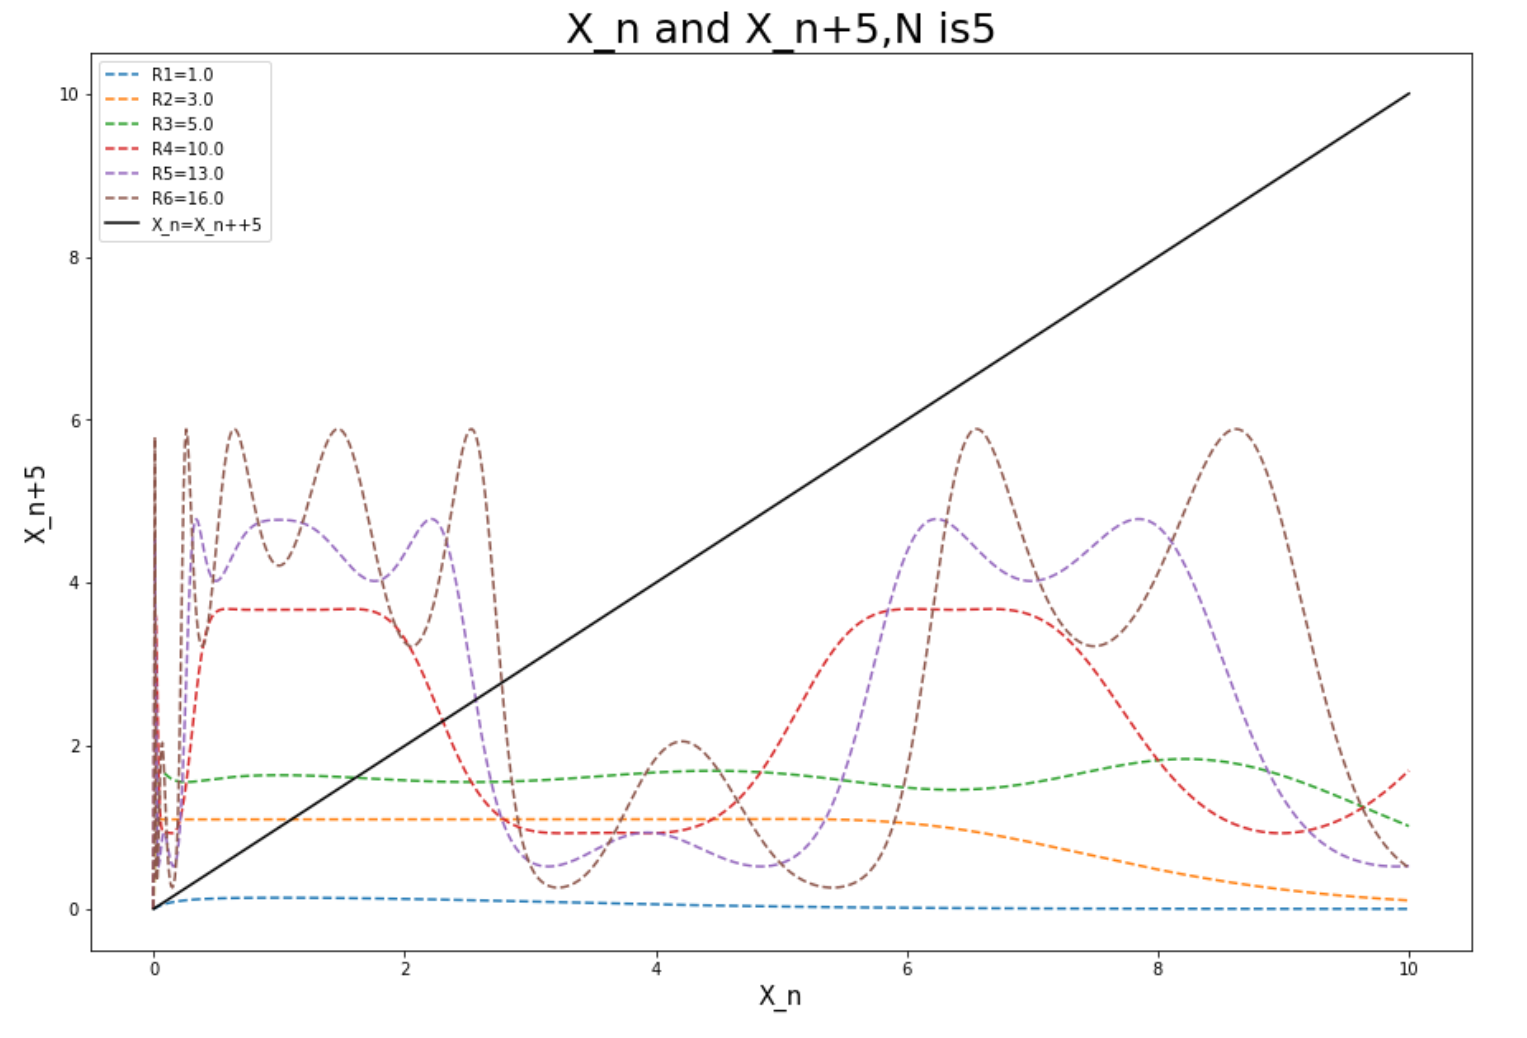

---------
--------
# 陆 · 问题与错误 &#x1F494;

-----------------
<font color=red size=5 >错误1：动画无法流畅执行，存在跳步</font>

 ## &#x261D;见——贰 · 循环次数  𝑛  与步长  𝑟  的选择

-----------------
<font color=red size=5 >错误2：交互模块无法更改排布，理想模式见下图。</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

grid = widgets.GridspecLayout(4, 3)
grid[0,0]=widgets.FloatSlider(min=0, max=100, step=0.001, value=1, readout_format='.3f',description='R1:')
grid[0,1]=widgets.FloatSlider(min=0, max=100, step=0.001, value=3, readout_format='.3f',description='R2:')
grid[0,2]=widgets.FloatSlider(min=0, max=100, step=0.001, value=5, readout_format='.3f',description='R3:')
grid[1,0]=widgets.FloatSlider(min=0, max=100, step=0.001, value=10, readout_format='.3f',description='R4:')
grid[1,1]=widgets.FloatSlider(min=0, max=100, step=0.001, value=13, readout_format='.3f',description='R5:')
grid[1,2]=widgets.FloatSlider(min=0, max=100, step=0.001, value=16, readout_format='.3f',description='R6:')
grid[2,0]=widgets.FloatSlider(min=0, max=50, step=0.001, value=10, readout_format='.3f',description='Xmax:')
grid[2,1]=widgets.FloatSlider(min=0, max=50, step=0.001, value=0, readout_format='.3f',description='Xmin:')
grid[2,2]=widgets.Checkbox(value=False,description='显示不动点',disabled=False,indent=False)
grid



NameError: name 'widgets' is not defined

-----------------
<font color=blue size=5 >问题1：色彩变化如何做到颜色不重</font>

RGB值随i的变化


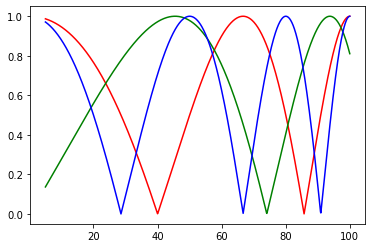

渐变色带


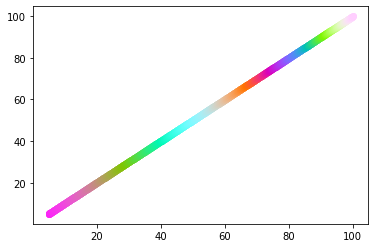

In [13]:
#单参数的色彩渐变函数
n=200
i=np.linspace(5,100,1000)

#函数区（待改进）
a1=np.abs(np.cos(2*i/(n-i)*3.14))
a2=np.abs(np.sin(1.7*i/(n-i)*3.14))
a3=np.abs(np.cos(3*i/(n-i)*3.14))
print('RGB值随i的变化')

plt.plot(i,a1,'r')
plt.plot(i,a2,'g')
plt.plot(i,a3,'b')
plt.show()
print('渐变色带')
for ln in range(0,1000):
#    print("{",a1[ln],a2[ln],a3[ln],"}")
    plt.scatter(i[ln],i[ln],color=(a1[ln],a2[ln],a3[ln]))

---------
--------
# 柒 · 致谢 

## 特别鸣谢&#x1F339;&#x1F339;&#x1F339;：19级学长赵冲指出<肆>中循环内赋初值的错误，19级学长魏盛龙指出<贰>中播放器STEP必须为整数值的隐含条件，以及与翁凯枫、来起正等同学的讨论交流。

>## 另：为方便交流讨论，相互学习，已将各次作业上传至[GitHub](https://github.com/HUSKYzjh/ke_xue_bian_cheng)